In [18]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
import warnings 
warnings.filterwarnings('ignore')

In [19]:
df=pd.read_csv("D:\walmart-sales-dataset-of-45stores.csv")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [22]:
#check for na 
cols = df.columns
df[cols].isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [23]:
#check for duplicates in dataset
duplicates = df.duplicated()
all(np.unique(duplicates))

False

In [24]:
#correct the date format
df['Date']=pd.to_datetime(df['Date'])
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [25]:
#to know the sum of sales in each store
Max_sale = df.groupby('Store')['Weekly_Sales'].sum().reset_index()
Max_sale


,Store,Weekly_Sales
0,1,2.224028e+08
1,2,2.753824e+08
2,3,5.758674e+07
3,4,2.995440e+08
4,5,4.547569e+07
5,6,2.237561e+08
6,7,8.159828e+07
7,8,1.299512e+08
8,9,7.778922e+07
9,10,2.716177e+08


In [26]:
# QUESTION A
# the store that  has maximum sales is 20 
Max_sale.sort_values(by=['Weekly_Sales'],ascending=False).head()

,Store,Weekly_Sales
19,20,3.013978e+08
3,4,2.995440e+08
13,14,2.889999e+08
12,13,2.865177e+08
1,2,2.753824e+08


In [27]:
#the store that has the maximum weekly sales in our daata
maxsales=df['Weekly_Sales'].max()
maxsalesstore=df[df['Weekly_Sales']==maxsales]
maxsalesstore

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,2010-12-24,3818686.45,0,30.59,3.141,182.54459,8.724


In [28]:
# to know the standard deviation of every store
Max_STD = df.groupby('Store')['Weekly_Sales'].agg(np.std).reset_index()
Max_STD.head(10)

,Store,Weekly_Sales
0,1,155980.767761
1,2,237683.694682
2,3,46319.631557
3,4,266201.442297
4,5,37737.965745
5,6,212525.855862
6,7,112585.469220
7,8,106280.829881
8,9,69028.666585
9,10,302262.062504


In [29]:
#QUESTION B
#the store has maximum  standard deviation is 14
Max_STD.sort_values(by = ['Weekly_Sales'],ascending=False).head()

,Store,Weekly_Sales
13,14,317569.949476
9,10,302262.062504
19,20,275900.562742
3,4,266201.442297
12,13,265506.995776


In [30]:
# each holyday and its sales mean 
Super_Bowl = ['12-2-2010','11-2-2011','10-2-2012']
Labour_Day = ['10-9-2010','9-9-2011','7-9-2012']
Thanksgiving = ['26-11-2010','25-11-2011','23-11-2012']
Christmas = ['31-12-2010','30-12-2011','28-12-2012']
SuperBowl_sales = df.loc[ df.Date.isin(Super_Bowl)][ 'Weekly_Sales' ].reset_index()
LabourDay_sales = df.loc[df.Date.isin(Labour_Day )][ 'Weekly_Sales'].reset_index()
Thanksgiving_sales = df.loc[df.Date.isin( Thanksgiving)]['Weekly_Sales'].reset_index()
Christmas_sales = df.loc[df.Date.isin(Christmas)]['Weekly_Sales'].reset_index()
SuperBowl_sales_mean = df.loc[ df.Date.isin(Super_Bowl)][ 'Weekly_Sales' ].mean()
LabourDay_sales_mean = df.loc[df.Date.isin(Labour_Day )][ 'Weekly_Sales'].mean()
Thanksgiving_sales_mean = df.loc[df.Date.isin( Thanksgiving)]['Weekly_Sales'].mean()
Christmas_sales_mean = df.loc[df.Date.isin(Christmas)]['Weekly_Sales'].mean()
non_holiday_sales = df[(df['Holiday_Flag'] == 0)][ 'Weekly_Sales' ].mean()
dataframe={'Mean_Sales':[SuperBowl_sales_mean,LabourDay_sales_mean,Thanksgiving_sales_mean,Christmas_sales_mean,non_holiday_sales]}
data=pd.DataFrame(dataframe,index=['Super Bowl mean Sales','Labour Day mean Sales','Thanksgiving mean Sales','Christmas mean Sales','Non Holiday mean Sales'])
data

,Mean_Sales
Super Bowl mean Sales,1.079128e+06
Labour Day mean Sales,1.042427e+06
Thanksgiving mean Sales,1.471273e+06
Christmas mean Sales,9.608331e+05
Non Holiday mean Sales,1.041256e+06


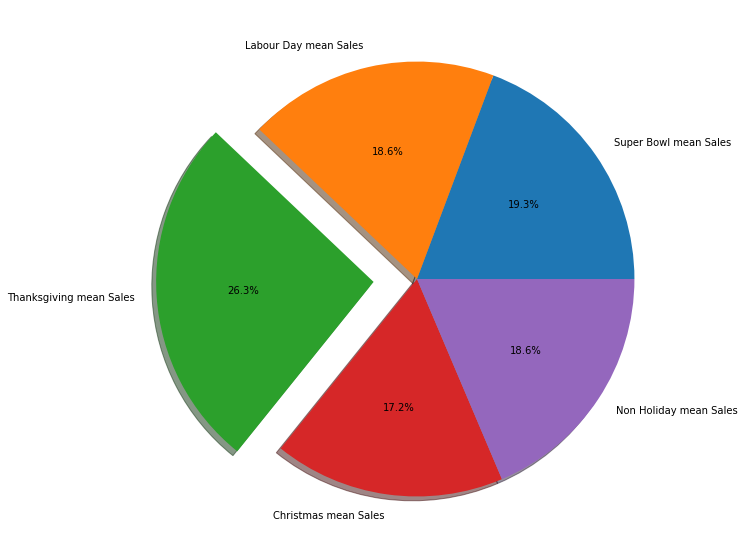

In [31]:
#plotting every holyday and its sales mean
plt.figure(figsize=(20,10))
myexplode=[0,0,0.2,0,0]
plt.pie(data['Mean_Sales'],labels=data.index,autopct='%1.1f%%',explode=myexplode,shadow=True)
plt.show()

In [32]:
#QUESTION C 
# All the holydays that have sales mean greater than non holydays mean
data[data['Mean_Sales']>non_holiday_sales]

,Mean_Sales
Super Bowl mean Sales,1.079128e+06
Labour Day mean Sales,1.042427e+06
Thanksgiving mean Sales,1.471273e+06


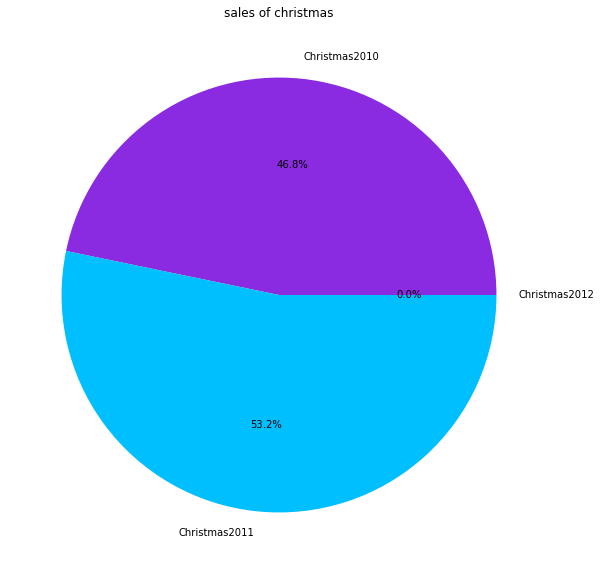

,christmas_sales
Christmas2010,40432519.00
Christmas2011,46042461.04
Christmas2012,0.00


In [33]:
#group the data with respect to christmas in three years
christmas2010=df[df['Date']==Christmas[0]]
christmas2011=df[df['Date']==Christmas[1]]
christmas2012=df[df['Date']==Christmas[2]]

christmas1_sales=christmas2010['Weekly_Sales'].sum()
christmas2_sales=christmas2011['Weekly_Sales'].sum()
christmas3_sales=christmas2012['Weekly_Sales'].sum()
christmas1_sales

# merge the three data
dataofchristmas={'christmas_sales':[christmas1_sales,christmas2_sales,christmas3_sales]}
dataofchristmas=pd.DataFrame(dataofchristmas,index=['Christmas2010','Christmas2011','Christmas2012'])
#visualize the splitting data of chrismas 
plt.figure(figsize=(30,10))
explode=[0,0.2,0]
plt.pie(dataofchristmas['christmas_sales'],labels=dataofchristmas.index,autopct='%1.1f%%',shadow=False,colors=['#8A2BE2','deepskyblue','#00FFFF'])
plt.title('sales of christmas')
plt.show()
dataofchristmas

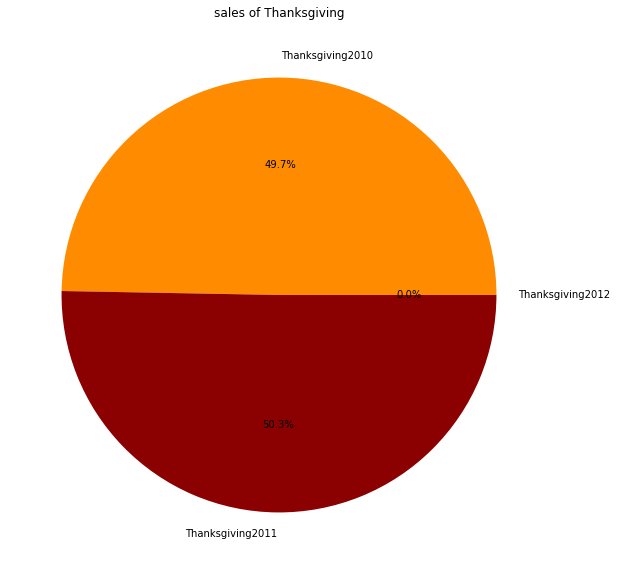

,Thanksgiving_sales
Thanksgiving2010,65821003.24
Thanksgiving2011,66593605.26
Thanksgiving2012,0.00


In [34]:
#group the data with respect to Thanksgiving in three years
Thanksgiving2010=df[df['Date']==Thanksgiving[0]]
Thanksgiving2011=df[df['Date']==Thanksgiving[1]]
Thanksgiving2012=df[df['Date']==Thanksgiving[2]]

Thanksgiving1_sales=Thanksgiving2010['Weekly_Sales'].sum()
Thanksgiving2_sales=Thanksgiving2011['Weekly_Sales'].sum()
Thanksgiving3_sales=Thanksgiving2012['Weekly_Sales'].sum()
Thanksgiving1_sales

# merge the three data
dataofThanksgiving={'Thanksgiving_sales':[Thanksgiving1_sales,Thanksgiving2_sales,Thanksgiving3_sales]}
dataofThanksgiving=pd.DataFrame(dataofThanksgiving,index=['Thanksgiving2010','Thanksgiving2011','Thanksgiving2012'])
#visualize the splitting data of thanksgiving 

plt.figure(figsize=(30,10))
explode=[0,0.2,0]
plt.pie(dataofThanksgiving['Thanksgiving_sales'],labels=dataofThanksgiving.index,autopct='%1.1f%%',shadow=False,colors=['#FF8C00','#8B0000','#00FFFF'])
plt.title('sales of Thanksgiving')
plt.show()
dataofThanksgiving

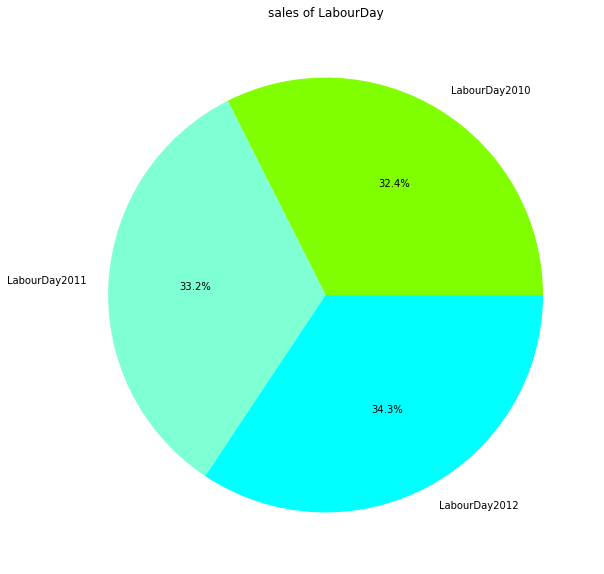

,LabourDay_sales
LabourDay2010,45634397.84
LabourDay2011,46763227.53
LabourDay2012,48330059.31


In [35]:
#group the data with respect to LabourDay in three years
LabourDay2010=df[df['Date']==Labour_Day[0]]
LabourDay2011=df[df['Date']==Labour_Day[1]]
LabourDay2012=df[df['Date']==Labour_Day[2]]

LabourDay1_sales=LabourDay2010['Weekly_Sales'].sum()
LabourDay2_sales=LabourDay2011['Weekly_Sales'].sum()
LabourDay3_sales=LabourDay2012['Weekly_Sales'].sum()


# merge the three data
dataofLabourDay={'LabourDay_sales':[LabourDay1_sales,LabourDay2_sales,LabourDay3_sales]}
dataofLabourDay=pd.DataFrame(dataofLabourDay,index=['LabourDay2010','LabourDay2011','LabourDay2012'])
#visualize the splitting data of LabourDay 

plt.figure(figsize=(30,10))
explode=[0,0.2,0]
plt.pie(dataofLabourDay['LabourDay_sales'],labels=dataofLabourDay.index,autopct='%1.1f%%',shadow=False,colors=['#7FFF00','#7FFFD4','#00FFFF'])
plt.title('sales of LabourDay')
plt.show()
dataofLabourDay

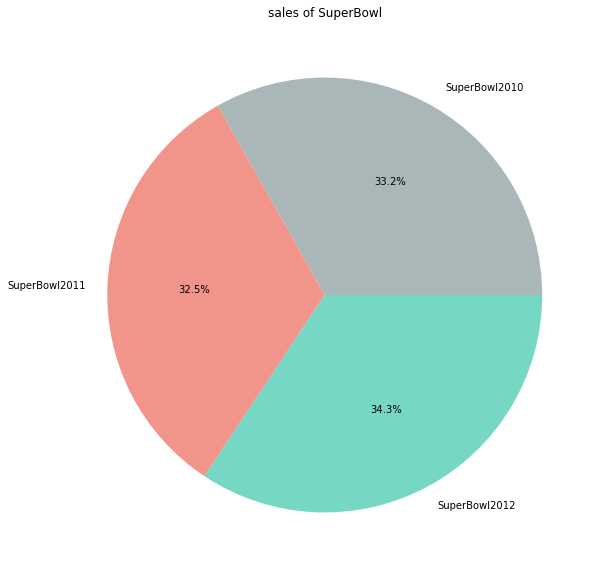

,SuperBowl_sales
SuperBowl2010,48336677.63
SuperBowl2011,47336192.79
SuperBowl2012,50009407.92


In [36]:
#group the data with respect to SuperBowl in three years
SuperBowl2010=df[df['Date']==Super_Bowl[0]]
SuperBowl2011=df[df['Date']==Super_Bowl[1]]
SuperBowl2012=df[df['Date']==Super_Bowl[2]]

SuperBowl1_sales=SuperBowl2010['Weekly_Sales'].sum()
SuperBowl2_sales=SuperBowl2011['Weekly_Sales'].sum()
SuperBowl3_sales=SuperBowl2012['Weekly_Sales'].sum()


# merge the three data
dataofSuperBowl={'SuperBowl_sales':[SuperBowl1_sales,SuperBowl2_sales,SuperBowl3_sales]}
dataofSuperBowl=pd.DataFrame(dataofSuperBowl,index=['SuperBowl2010','SuperBowl2011','SuperBowl2012'])
#visualize the splitting data of SuperBowl 

plt.figure(figsize=(30,10))
explode=[0,0.2,0]
plt.pie(dataofSuperBowl['SuperBowl_sales'],labels=dataofSuperBowl.index,autopct='%1.1f%%',shadow=False,colors=['#AAB7B8','#F1948A','#76D7C4'])
plt.title('sales of SuperBowl')
plt.show()
dataofSuperBowl

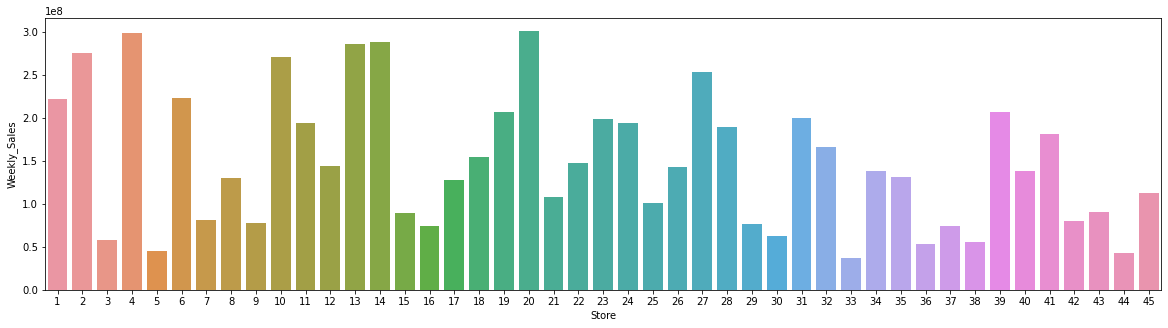

In [37]:
#plotting the sales of each store in the data
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data=Max_sale, x="Store", y=Max_sale.Weekly_Sales, ax=ax)
plt.show()

In [38]:
#QUESTION D
#add columns year and month in our data
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5


Text(0.5, 1.0, 'Monthly_Sales')

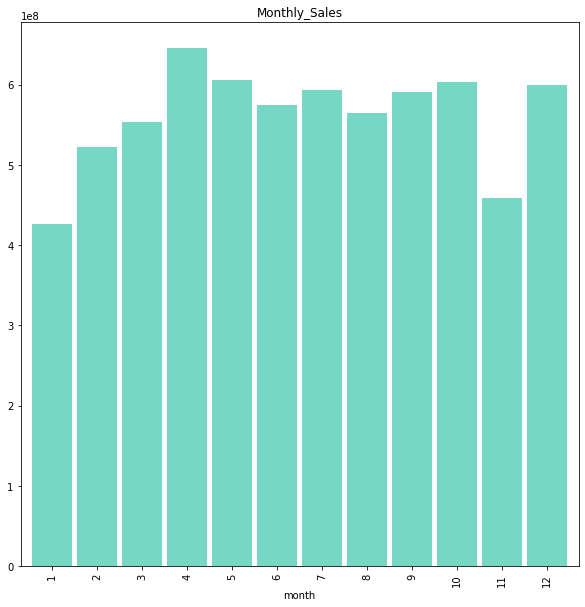

In [39]:
#plotting the sum of sales  in all monthes and year
df.groupby('month')['Weekly_Sales'].sum().plot(kind='bar',legend=False,figsize=(10,10),width=0.9,color='#76D7C4')
plt.title('Monthly_Sales')

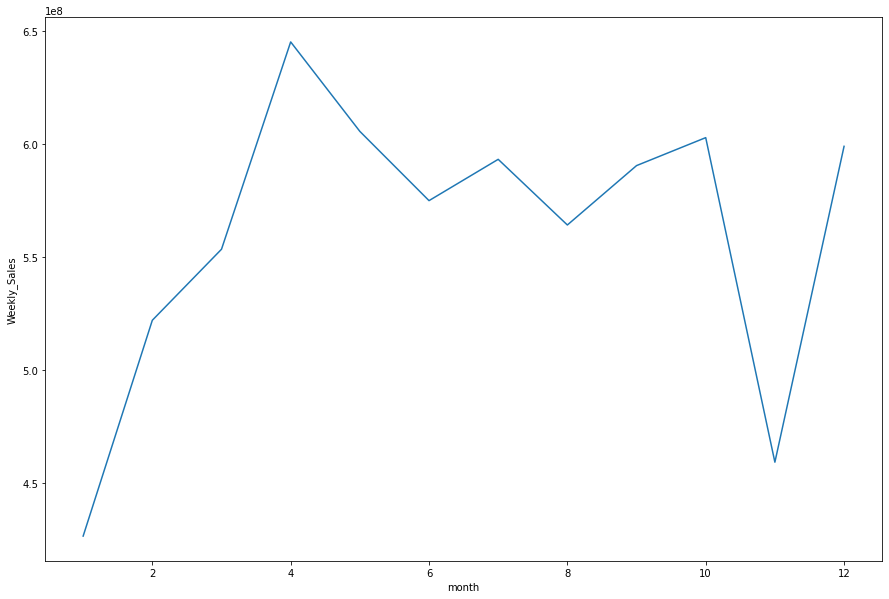

In [40]:
#another plot for the sales in every month in all years
datamonth=df.groupby('month')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(15,10))
sns.lineplot(data=datamonth,x=datamonth['month'],y=datamonth['Weekly_Sales'])
plt.show()

In [41]:
#split data in every year and sum all sales of every month 

#every month sales in 2010
dataIn2010=df[df['year']==2010]
data10=dataIn2010.groupby('month')['Weekly_Sales'].sum().to_frame()

#every month sales in 2011
dataIn2011=df[df['year']==2011]
data11=dataIn2011.groupby('month')['Weekly_Sales'].sum().to_frame()

#every month sales in 2012
dataIn2012=df[df['year']==2012]
data12=dataIn2012.groupby('month')['Weekly_Sales'].sum().to_frame()
data12

,Weekly_Sales
month,
1,1.722207e+08
2,1.428296e+08
3,2.307397e+08
4,1.825428e+08
5,1.422830e+08
6,2.923883e+08
7,1.845865e+08
8,1.916126e+08
9,1.797959e+08


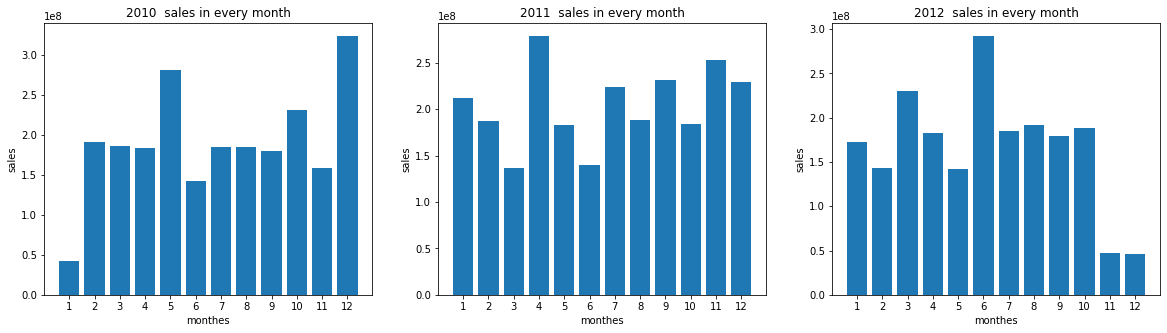

In [42]:
#visualize the data of sales of every month in 3 years
fig,axes=plt.subplots(1,3,figsize=(20,5))

#2010
axes[0].bar(data10.index,data10['Weekly_Sales'])
axes[0].set_title('2010  sales in every month')
axes[0].set_xlabel("monthes")
axes[0].set_ylabel("sales")
axes[0].set_xticks(data10.index)
#2011
axes[1].bar(data11.index,data11['Weekly_Sales'])
axes[1].set_title('2011  sales in every month')
axes[1].set_xlabel("monthes")
axes[1].set_ylabel("sales")
axes[1].set_xticks(data10.index)

#2012
axes[2].bar(data12.index,data12['Weekly_Sales'])
axes[2].set_title('2012  sales in every month')
axes[2].set_xlabel("monthes")
axes[2].set_ylabel("sales")
axes[2].set_xticks(data10.index)

plt.show()

In [43]:
#split sales into semester in every year

quartile1_2010=df[(df['month'].isin([1,2,3,4])) & (df['year'] == 2010)] 
quartile2_2010=df[(df['month'].isin([5,6,7,8])) & (df['year'] == 2010)] 
quartile3_2010=df[(df['month'].isin([9,10,11,12])) & (df['year'] == 2010)]  
sales_quartile1_2010=quartile1_2010['Weekly_Sales'].sum()
sales_quartile2_2010=quartile2_2010['Weekly_Sales'].sum() 
sales_quartile3_2010=quartile3_2010['Weekly_Sales'].sum()
dataquartile2010={'semester_sales':[sales_quartile1_2010,sales_quartile2_2010,sales_quartile3_2010]}
dataa10=pd.DataFrame(dataquartile2010,index=['salesq1','salesq2','salesq3'])
dataa10

,semester_sales
salesq1,6.038648e+08
salesq2,7.918524e+08
salesq3,8.931689e+08


In [44]:
#split sales into semester in every year

quartile1_2011=df[(df['month'].isin([1,2,3,4])) & (df['year'] == 2011)] 
quartile2_2011=df[(df['month'].isin([5,6,7,8])) & (df['year'] == 2011)] 
quartile3_2011=df[(df['month'].isin([9,10,11,12])) & (df['year'] == 2011)]  
sales_quartile1_2011=quartile1_2011['Weekly_Sales'].sum()
sales_quartile2_2011=quartile2_2011['Weekly_Sales'].sum() 
sales_quartile3_2011=quartile3_2011['Weekly_Sales'].sum()
dataquartile2011={'semester_sales':[sales_quartile1_2011,sales_quartile2_2011,sales_quartile3_2011]}
dataa11=pd.DataFrame(dataquartile2011,index=['salesq1','salesq2','salesq3'])
dataa11

,semester_sales
salesq1,8.150647e+08
salesq2,7.355374e+08
salesq3,8.975979e+08


In [45]:
#split sales into semester in every year

quartile1_2012=df[(df['month'].isin([1,2,3,4])) & (df['year'] == 2012)] 
quartile2_2012=df[(df['month'].isin([5,6,7,8])) & (df['year'] == 2012)] 
quartile3_2012=df[(df['month'].isin([9,10,11,12])) & (df['year'] == 2012)]  
sales_quartile1_2012=quartile1_2012['Weekly_Sales'].sum()
sales_quartile2_2012=quartile2_2012['Weekly_Sales'].sum() 
sales_quartile3_2012=quartile3_2012['Weekly_Sales'].sum()
dataquartile2012={'semester_sales':[sales_quartile1_2012,sales_quartile2_2012,sales_quartile3_2012]}
dataa12=pd.DataFrame(dataquartile2012,index=['salesq1','salesq2','salesq3'])
dataa12

,semester_sales
salesq1,7.283328e+08
salesq2,8.108704e+08
salesq3,4.609297e+08


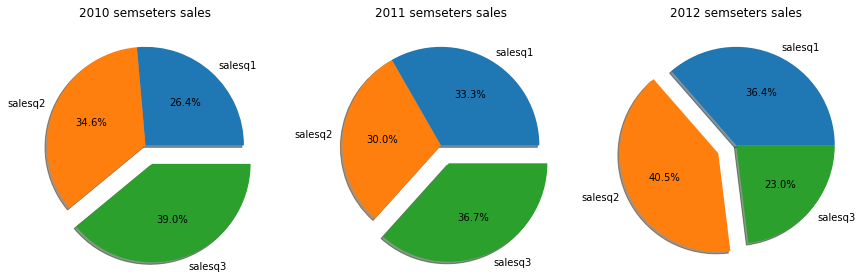

In [47]:
#visualize the splitting data of semester 
fig,axes=plt.subplots(1,3,figsize=(15,15))
myexplode = [0, 0, 0.2]
axes[0].pie(dataa10['semester_sales'],labels=dataa10.index,autopct='%1.1f%%',explode =myexplode,shadow=True)
axes[0].set_title('2010 semseters sales')

myexplode = [0, 0, 0.2]
axes[1].pie(dataa11['semester_sales'],labels=dataa11.index,autopct='%1.1f%%',explode =myexplode,shadow=True)
axes[1].set_title('2011 semseters sales')

myexplode = [0, 0.2, 0]
axes[2].pie(dataa12['semester_sales'],labels=dataa12.index,autopct='%1.1f%%',explode =myexplode,shadow=True)
axes[2].set_title('2012 semseters sales')
plt.show()

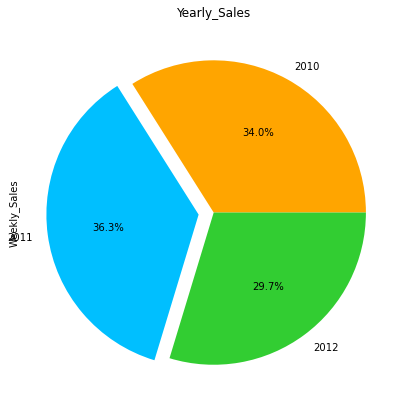

In [48]:
#All yearly sales in dataset
plt.figure(figsize=(10,7))
explode=[0,0.1,0]
df.groupby('year')['Weekly_Sales'].sum().plot(kind='pie',legend=False,autopct='%1.1f%%',colors=['orange','deepskyblue','limegreen'],explode=explode)
plt.title('Yearly_Sales')
plt.show()

In [49]:
#split quartiles of all years together 
quartile1=df[(df['month'].isin([1,2,3,4])) & (df['year'].isin([2010,2011,2012]))] 
quartile2=df[(df['month'].isin([5,6,7,8])) & (df['year'].isin([2010,2011,2012]))]
quartile3=df[(df['month'].isin([9,10,11,12])) & (df['year'].isin([2010,2011,2012]))]
salesquartile1=quartile1['Weekly_Sales'].sum()
salesquartile2=quartile2['Weekly_Sales'].sum() 
salesquartile3=quartile3['Weekly_Sales'].sum()
dataquartile={'Season_sales':[salesquartile1,salesquartile2,salesquartile3]}
quartilesofyears=pd.DataFrame(dataquartile,index=['Season1','Season2','Season3'])
quartilesofyears

,Season_sales
Season1,2.147262e+09
Season2,2.338260e+09
Season3,2.251697e+09


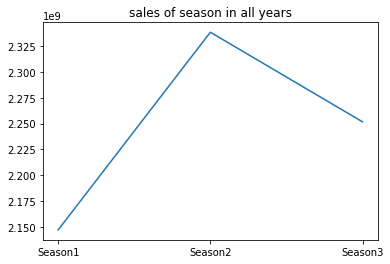

In [50]:
#display the sales of every season in all years
plt.plot(quartilesofyears['Season_sales'])
plt.title('sales of season in all years')
plt.show()

In [51]:
#QUESTION E

#split data with respect to sales and fuel price in 2010


sum_sale10 = dataIn2010.groupby('month')['Weekly_Sales'].sum().reset_index()
fueldata10 = dataIn2010.groupby('month')['Fuel_Price'].mean().reset_index()
datafuelsales2010 = pd.merge(sum_sale10,fueldata10)


#split data with respect to sales and fuel price in 2011


sum_sale11 = dataIn2011.groupby('month')['Weekly_Sales'].sum().reset_index()
fueldata11 = dataIn2011.groupby('month')['Fuel_Price'].mean().reset_index()
datafuelsales2011 = pd.merge(sum_sale11,fueldata11)


#split data with respect to sales and fuel price in 2012

sum_sale12 = dataIn2012.groupby('month')['Weekly_Sales'].sum().reset_index()
fueldata12 = dataIn2012.groupby('month')['Fuel_Price'].mean().reset_index()
datafuelsales2012 = pd.merge(sum_sale12,fueldata12)

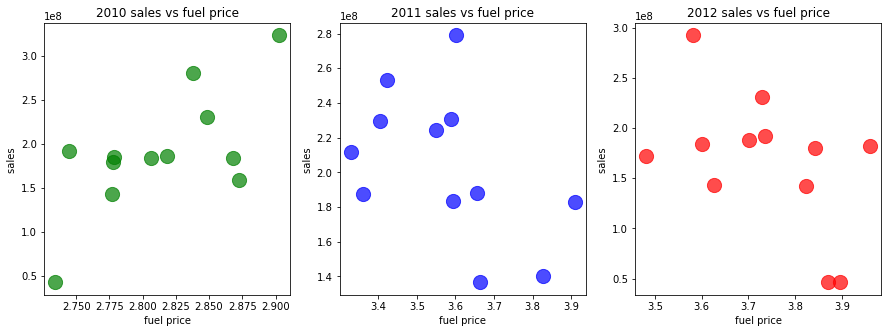

In [52]:
#visualize the data of sales and fuels in every year


fig,axes=plt.subplots(1,3,figsize=(15,5))


#2010
axes[0].scatter(datafuelsales2010['Fuel_Price'],datafuelsales2010['Weekly_Sales'],s=200,alpha=0.7 ,c='green')
axes[0].set_title('2010 sales vs fuel price')
axes[0].set_xlabel('fuel price')
axes[0].set_ylabel('sales ')


#2011
axes[1].scatter(datafuelsales2011['Fuel_Price'],datafuelsales2011['Weekly_Sales'],s=200,alpha=0.7 ,c='blue')
axes[1].set_title('2011 sales vs fuel price')
axes[1].set_xlabel('fuel price')
axes[1].set_ylabel('sales ')



#2012
axes[2].scatter(datafuelsales2012['Fuel_Price'],datafuelsales2012['Weekly_Sales'],s=200,alpha=0.7 ,c='red')
axes[2].set_title('2012 sales vs fuel price')
axes[2].set_xlabel('fuel price')
axes[2].set_ylabel('sales ')

plt.show()

In [53]:
#split data of sales with respect to Temperature

temp=df.groupby('Date')['Temperature'].mean().to_frame().reset_index().round(3)
weeksales=df.groupby('Date')['Weekly_Sales'].sum().to_frame().reset_index().round(3)
salestemp=pd.merge(temp,weeksales)
salestemp

,Date,Temperature,Weekly_Sales
0,2010-01-10,69.868,42239875.87
1,2010-02-04,53.121,50423831.26
2,2010-02-07,77.133,48917484.50
3,2010-02-19,37.720,48276993.78
4,2010-02-26,39.244,43968571.13
...,...,...,...
138,2012-10-08,81.580,47403451.04
139,2012-10-19,60.705,45122410.57
140,2012-10-26,61.051,45544116.29
141,2012-11-05,64.838,46925878.99


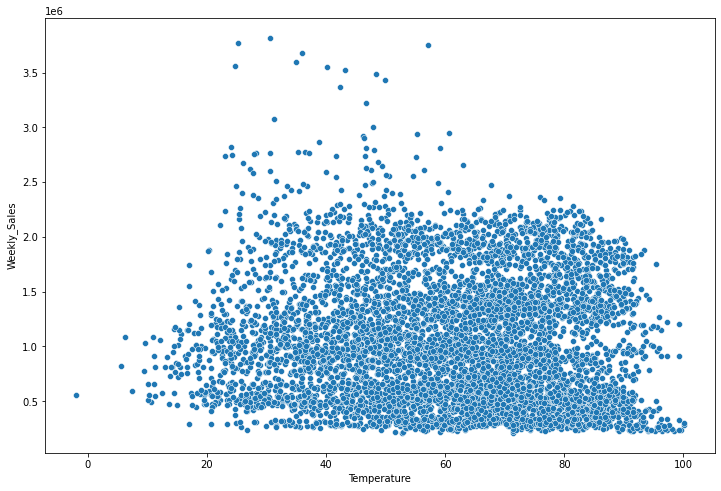

In [54]:
#plot sales vs Temperature wholesome
fig,ax=plt.subplots(figsize=(12,8))
sns.scatterplot(data=df, x=df['Temperature'], y=df['Weekly_Sales'])
plt.show()

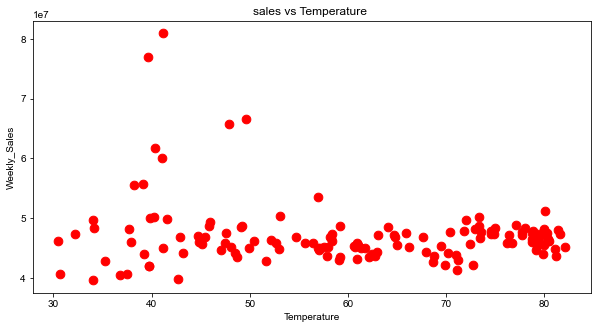

In [55]:
#plot sales vs Temperature with respect to same date 
plt.figure(figsize=(10,5))
plt.scatter(salestemp['Temperature'],salestemp['Weekly_Sales'],s=75,c='red')
sns.set_style("darkgrid")
plt.title('sales vs Temperature ')
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')
plt.show()

In [56]:
#split data with respect to sales and unemployment in 2010


sum_sale10 = dataIn2010.groupby('month')['Weekly_Sales'].sum().reset_index()
unempdata10 = dataIn2010.groupby('month')['Unemployment'].mean().reset_index()
umepsales2010 = pd.merge(sum_sale10,unempdata10)


#split data with respect to sales and unemployment in 2011


sum_sale11 = dataIn2011.groupby('month')['Weekly_Sales'].sum().reset_index()
unempdata11 = dataIn2011.groupby('month')['Unemployment'].mean().reset_index()
umepsales2011 = pd.merge(sum_sale11,unempdata11)


#split data with respect to sales and unemployment in 2012
sum_sale12 = dataIn2012.groupby('month')['Weekly_Sales'].sum().reset_index()
unempdata12 = dataIn2012.groupby('month')['Unemployment'].mean().reset_index()
umepsales2012 = pd.merge(sum_sale12,unempdata12)


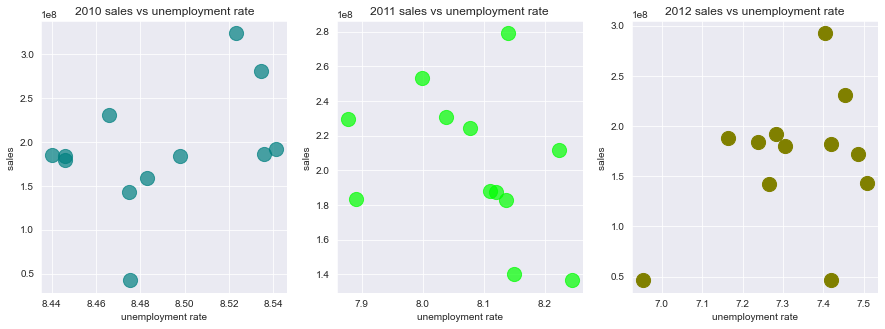

In [57]:
#plot data of sales in every year with respect to Unemployment rate

fig,axes=plt.subplots(1,3,figsize=(15,5))

#2010
axes[0].scatter(umepsales2010['Unemployment'],umepsales2010['Weekly_Sales'],s=200,alpha=0.7 ,c='teal')
axes[0].set_title('2010 sales vs unemployment rate')
axes[0].set_xlabel('unemployment rate')
axes[0].set_ylabel('sales ')


#2011
axes[1].scatter(umepsales2011['Unemployment'],umepsales2011['Weekly_Sales'],s=200,alpha=0.7 ,c='lime')
axes[1].set_title('2011 sales vs unemployment rate')
axes[1].set_xlabel('unemployment rate')
axes[1].set_ylabel('sales ')



#2012
axes[2].scatter(umepsales2012['Unemployment'],umepsales2012['Weekly_Sales'],s=200,alpha=1 ,c='olive')
axes[2].set_title('2012 sales vs unemployment rate')
axes[2].set_xlabel('unemployment rate')
axes[2].set_ylabel('sales ')

plt.show()

In [58]:
#split data with respect to sales and cpi rate in 2010


sum_sale10 = dataIn2010.groupby('month')['Weekly_Sales'].sum().reset_index()
cpidata10 = dataIn2010.groupby('month')['CPI'].mean().reset_index()
cpisales2010 = pd.merge(sum_sale10,cpidata10)


#split data with respect to sales and cpi rate in 2011


sum_sale11 = dataIn2011.groupby('month')['Weekly_Sales'].sum().reset_index()
cpidata11 = dataIn2011.groupby('month')['CPI'].mean().reset_index()
cpisales2011 = pd.merge(sum_sale11,cpidata11)


#split data with respect to sales and cpi rate in 2012
sum_sale12 = dataIn2012.groupby('month')['Weekly_Sales'].sum().reset_index()
cpidata12 = dataIn2012.groupby('month')['CPI'].mean().reset_index()
cpisales2012 = pd.merge(sum_sale12,cpidata12)
cpisales2011

,month,Weekly_Sales,CPI
0,1,2.119657e+08,169.742571
1,2,1.876092e+08,171.282465
2,3,1.365205e+08,170.741833
3,4,2.789693e+08,170.978757
4,5,1.828017e+08,171.489324
5,6,1.401936e+08,171.280956
6,7,2.244611e+08,171.255562
7,8,1.880810e+08,171.571944
8,9,2.310323e+08,172.571884
9,10,1.837193e+08,172.519764


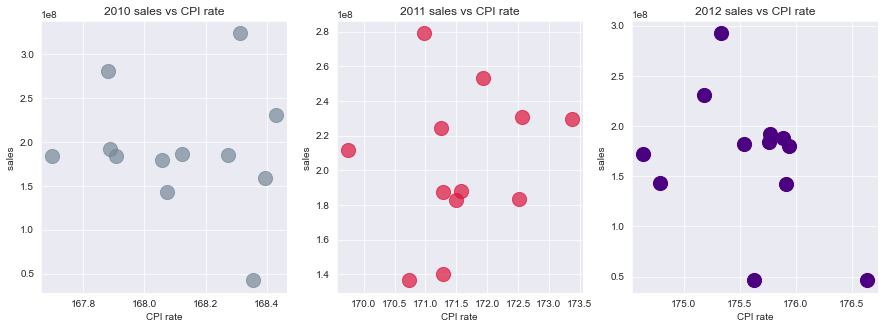

In [59]:
#plot data of sales in every year with respect to CPI rate

fig,axes=plt.subplots(1,3,figsize=(15,5))
#2010
axes[0].scatter(cpisales2010['CPI'],cpisales2010['Weekly_Sales'],s=200,alpha=0.7 ,c='lightslategrey')
axes[0].set_title('2010 sales vs CPI rate')
axes[0].set_xlabel('CPI rate')
axes[0].set_ylabel('sales ')


#2011
axes[1].scatter(cpisales2011['CPI'],cpisales2011['Weekly_Sales'],s=200,alpha=0.7 ,c='crimson')
axes[1].set_title('2011 sales vs CPI rate')
axes[1].set_xlabel('CPI rate')
axes[1].set_ylabel('sales ')



#2012
axes[2].scatter(cpisales2012['CPI'],cpisales2012['Weekly_Sales'],s=200,alpha=1 ,c='indigo')
axes[2].set_title('2012 sales vs CPI rate')
axes[2].set_xlabel('CPI rate')
axes[2].set_ylabel('sales ')

plt.show()

In [60]:
# to group the data about date and sum of sales in all stores
dfmonth=df.groupby('Date')['Weekly_Sales'].sum().reset_index()
dfmonth

,Date,Weekly_Sales
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13
...,...,...
138,2012-10-08,47403451.04
139,2012-10-19,45122410.57
140,2012-10-26,45544116.29
141,2012-11-05,46925878.99


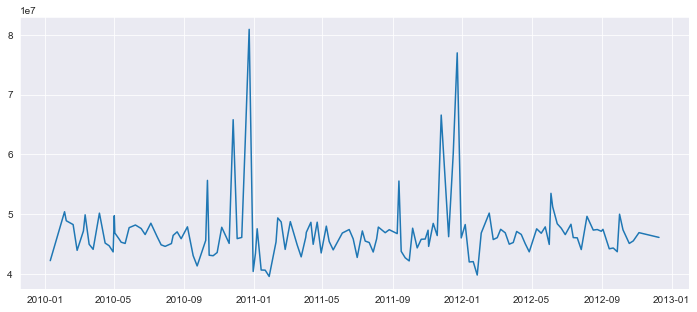

In [61]:
#plotting the sales in every month in dataset
plt.figure(figsize=(12,5))
plt.plot(dfmonth['Date'],dfmonth['Weekly_Sales'])
plt.show()

In [62]:
#group the data in every year and split it in order of monthes and its sales
salesmonthin2010=dataIn2010.groupby('Date')['Weekly_Sales'].sum().reset_index()

salesmonthin2011=dataIn2011.groupby('Date')['Weekly_Sales'].sum().reset_index()


salesmonthin2012=dataIn2012.groupby('Date')['Weekly_Sales'].sum().reset_index()


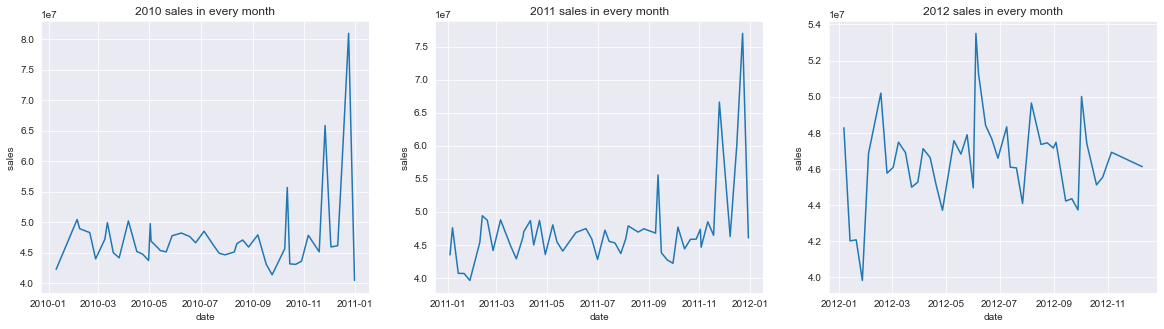

In [63]:
#plot data of sales in every year with respect to CPI rate

fig,axes=plt.subplots(1,3,figsize=(20,5))
#2010
axes[0].plot(salesmonthin2010['Date'],salesmonthin2010['Weekly_Sales'])
axes[0].set_title('2010 sales in every month')
axes[0].set_xlabel('date')
axes[0].set_ylabel('sales ')


#2011
axes[1].plot(salesmonthin2011['Date'],salesmonthin2011['Weekly_Sales'])
axes[1].set_title('2011 sales in every month')
axes[1].set_xlabel('date')
axes[1].set_ylabel('sales ')



#2012
axes[2].plot(salesmonthin2012['Date'],salesmonthin2012['Weekly_Sales'])
axes[2].set_title('2012 sales in every month')
axes[2].set_xlabel('date')
axes[2].set_ylabel('sales ')

plt.show()